<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Search_Advertising_Chart_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating random dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import numpy as np
import pandas as pd

np.random.seed(0)  # For reproducibility

keywords = ['Keyword_' + str(i) for i in range(1, 51)]
locations = ['USA', 'Canada', 'UK']
devices = ['Mobile', 'Desktop', 'Tablet']

sem_data = {
    "Keyword": np.random.choice(keywords, size=1000),
    "Location": np.random.choice(locations, size=1000),
    "Device": np.random.choice(devices, size=1000),
    "Impressions": np.random.randint(500, 10000, size=1000),
    "Clicks": np.random.randint(50, 500, size=1000),
    "Conversions": np.random.randint(1, 100, size=1000),
    "CPC": np.random.uniform(0.5, 20, size=1000)
}

sem_df = pd.DataFrame(sem_data)

# Calculate CTR and Conversion Rate
sem_df['CTR'] = sem_df['Clicks'] / sem_df['Impressions']
sem_df['Conversion Rate'] = sem_df['Conversions'] / sem_df['Clicks']

# Calculate Cost based on Impressions and Clicks
sem_df['Cost'] = sem_df['Clicks'] * sem_df['CPC']


# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Start and end date
start = pd.to_datetime('2021-01-01')
end = pd.to_datetime('2022-12-31')

# Add date column
sem_df['Date'] = random_dates(start, end, sem_df.shape[0])

# Sort by date
sem_df.sort_values('Date', inplace=True)




# Print the dataframe
print(sem_df.head())





        Keyword Location   Device  Impressions  Clicks  Conversions  \
199   Keyword_8       UK  Desktop         5517     133           58   
261  Keyword_46       UK  Desktop         2403     281           30   
964  Keyword_38   Canada   Tablet         4986     154           60   
774  Keyword_33       UK  Desktop         9594     471           60   
172  Keyword_45      USA  Desktop         3963     377           20   

           CPC       CTR  Conversion Rate         Cost                Date  
199   3.325144  0.024107         0.436090   442.244141 2021-01-02 08:02:29  
261  10.247721  0.116937         0.106762  2879.609546 2021-01-03 04:07:01  
964  11.660181  0.030886         0.389610  1795.667820 2021-01-03 07:29:30  
774  12.405852  0.049093         0.127389  5843.156501 2021-01-04 07:41:31  
172   7.246801  0.095130         0.053050  2732.044064 2021-01-04 10:57:03  


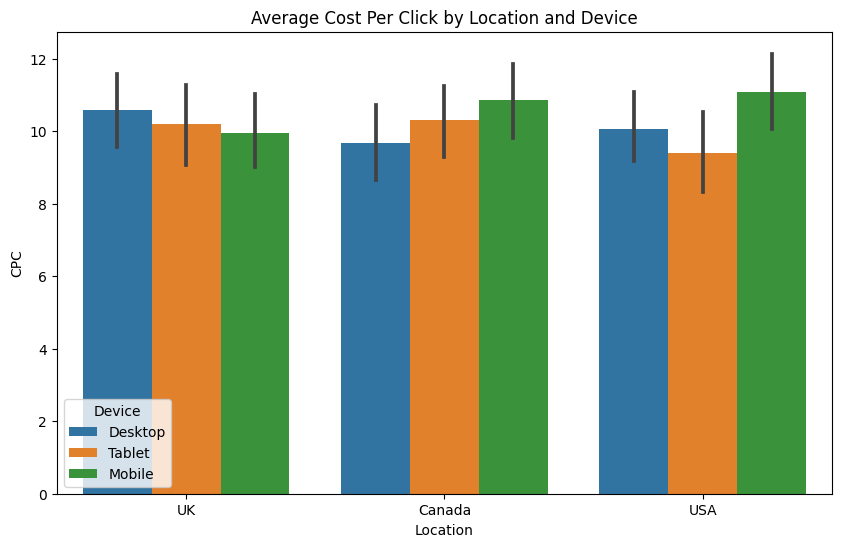

In [ ]:
# Calculate average CPC
sem_df['CPC'] = sem_df['Cost'] / sem_df['Clicks']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='CPC', hue='Device', data=sem_df)
plt.title('Average Cost Per Click by Location and Device')
plt.show()


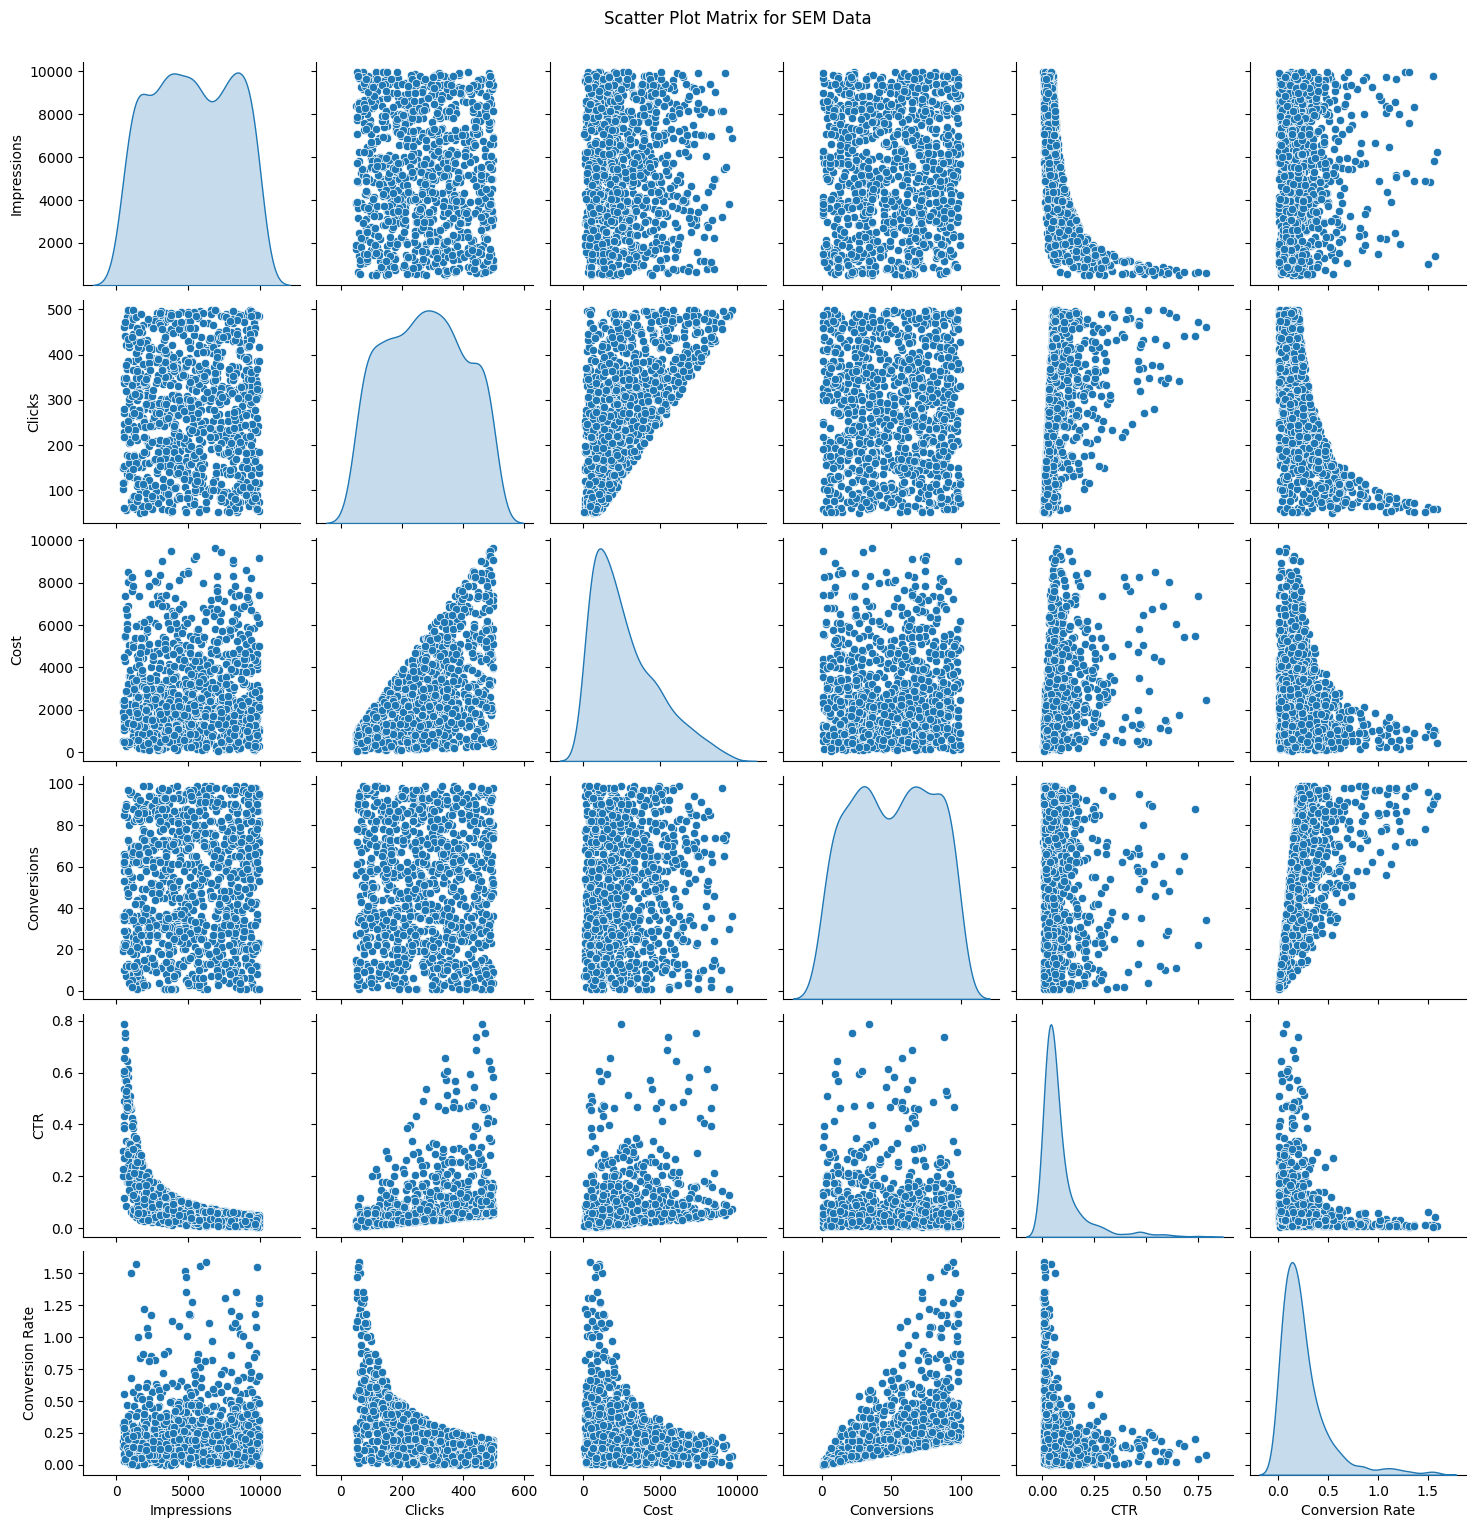

In [ ]:
# Create a scatter plot matrix
sns.pairplot(sem_df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'CTR', 'Conversion Rate']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for SEM Data', y=1.02)
plt.show()


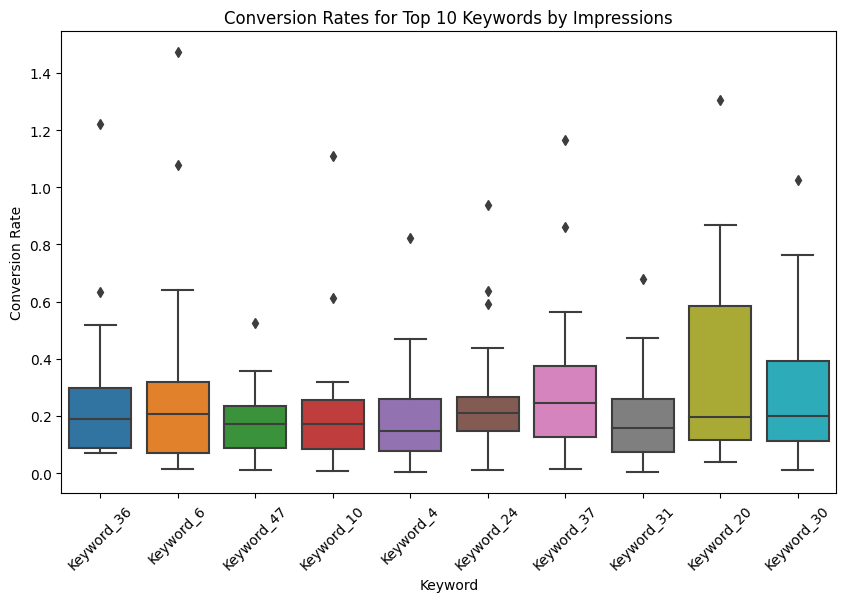

In [ ]:
# Top 10 keywords by Impressions
top_keywords = sem_df.groupby('Keyword')['Impressions'].sum().nlargest(10).index

# Filter dataframe for top keywords
top_keywords_df = sem_df[sem_df['Keyword'].isin(top_keywords)]

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Keyword', y='Conversion Rate', data=top_keywords_df)
plt.title('Conversion Rates for Top 10 Keywords by Impressions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Add Ad Version to our data
ad_versions = ['Version_A', 'Version_B']
sem_df['Ad Version'] = np.random.choice(ad_versions, size=1000)


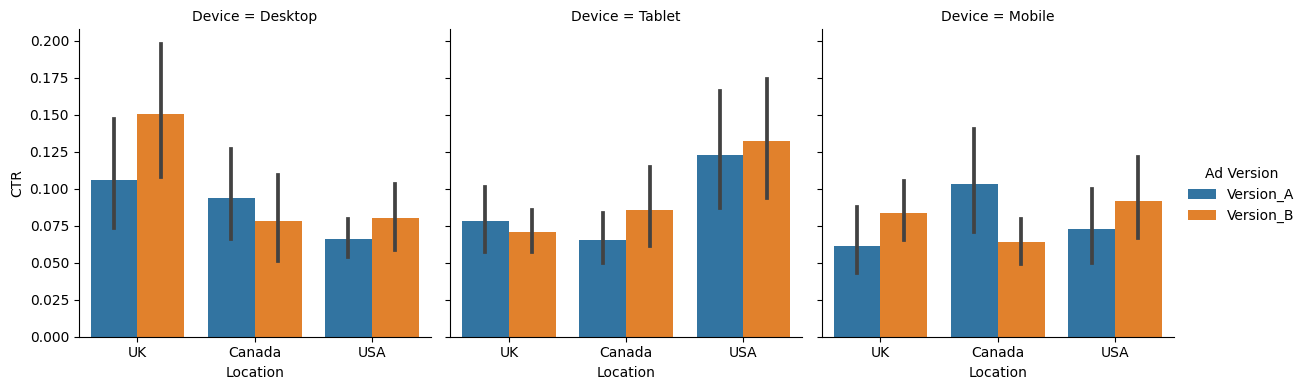

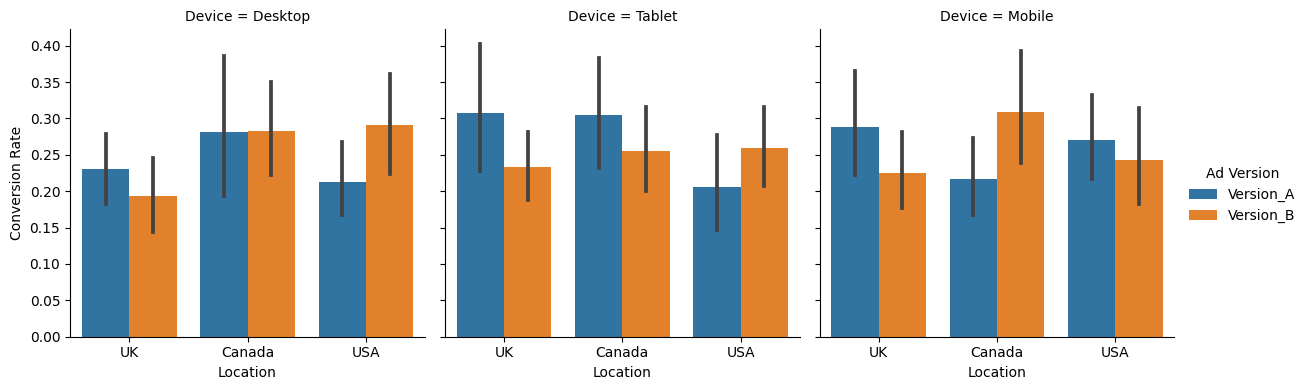

In [ ]:
# Create a combined bar plot
sns.catplot(
    x='Location', 
    y='CTR', 
    hue='Ad Version', 
    col='Device', 
    data=sem_df, 
    kind='bar', 
    height=4, 
    aspect=1
)

sns.catplot(
    x='Location', 
    y='Conversion Rate', 
    hue='Ad Version', 
    col='Device', 
    data=sem_df, 
    kind='bar', 
    height=4, 
    aspect=1
)
plt.show()


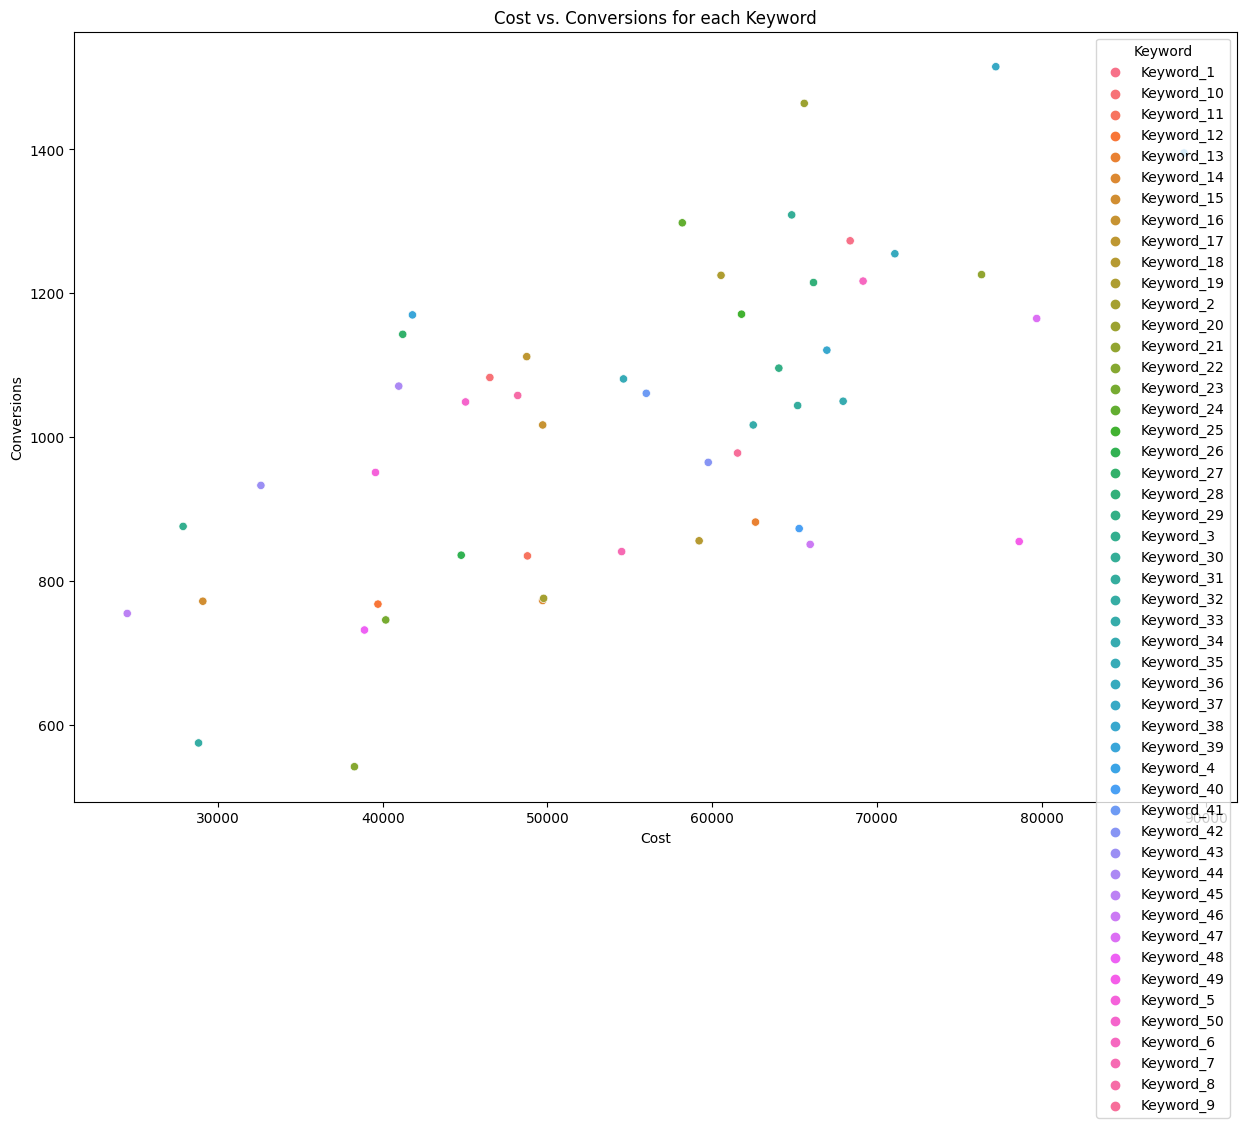

In [ ]:
# Aggregate Cost and Conversions by Keyword
keyword_performance = sem_df.groupby('Keyword')[['Cost', 'Conversions']].sum().reset_index()

# Create scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Cost', y='Conversions', hue='Keyword', data=keyword_performance)
plt.title('Cost vs. Conversions for each Keyword')
plt.show()


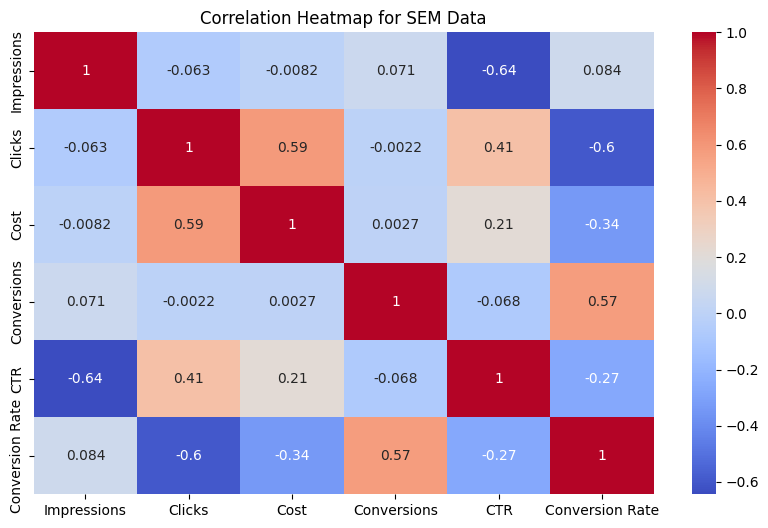

In [ ]:
# Compute correlations
correlations = sem_df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'CTR', 'Conversion Rate']].corr()

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for SEM Data')
plt.show()


In [ ]:
# Generate a report for the latest data
latest_df = sem_df[sem_df['Date'] == sem_df['Date'].max()]

# 1. Total Cost, Impressions, Clicks, Conversions
total_metrics = latest_df[['Cost', 'Impressions', 'Clicks', 'Conversions']].sum()
print(f"Total Metrics for {sem_df['Date'].max()}")
print(total_metrics)

# 2. CTR, CPC, Conversion Rate by Location
location_metrics = latest_df.groupby('Location')[['CTR', 'CPC', 'Conversion Rate']].mean()
print("\nAverage CTR, CPC, Conversion Rate by Location")
print(location_metrics)

# 3. Top 10 Keywords by Impressions
top_keywords = latest_df.groupby('Keyword')['Impressions'].sum().nlargest(10)
print("\nTop 10 Keywords by Impressions")
print(top_keywords)

# 4. Number of Clicks by Device
device_clicks = latest_df.groupby('Device')['Clicks'].sum()
print("\nNumber of Clicks by Device")
print(device_clicks)

# 5. Conversion Rate by Ad Version
ad_version_conversion_rate = latest_df.groupby('Ad Version')['Conversion Rate'].mean()
print("\nConversion Rate by Ad Version")
print(ad_version_conversion_rate)


Total Metrics for 2022-12-30 19:30:23
Cost           4688.884362
Impressions    8989.000000
Clicks          244.000000
Conversions      49.000000
dtype: float64

Average CTR, CPC, Conversion Rate by Location
               CTR        CPC  Conversion Rate
Location                                      
Canada    0.027144  19.216739          0.20082

Top 10 Keywords by Impressions
Keyword
Keyword_37    8989
Name: Impressions, dtype: int64

Number of Clicks by Device
Device
Tablet    244
Name: Clicks, dtype: int64

Conversion Rate by Ad Version
Ad Version
Version_A    0.20082
Name: Conversion Rate, dtype: float64


In [ ]:
# Generate a report for the latest data
latest_df = sem_df[sem_df['Date'] == sem_df['Date'].max()]

# 1. Total Cost, Impressions, Clicks, Conversions
total_metrics = latest_df[['Cost', 'Impressions', 'Clicks', 'Conversions']].sum()
print(f"Total Metrics for {sem_df['Date'].max()}")
print(total_metrics)

# 2. CTR, CPC, Conversion Rate by Location
location_metrics = latest_df.groupby('Location')[['CTR', 'CPC', 'Conversion Rate']].mean()
print("\nAverage CTR, CPC, Conversion Rate by Location")
print(location_metrics)

# 3. Top 10 Keywords by Impressions
top_keywords = latest_df.groupby('Keyword')['Impressions'].sum().nlargest(10)
print("\nTop 10 Keywords by Impressions")
print(top_keywords)

# 4. Number of Clicks by Device
device_clicks = latest_df.groupby('Device')['Clicks'].sum()
print("\nNumber of Clicks by Device")
print(device_clicks)

# 5. Conversion Rate by Ad Version
ad_version_conversion_rate = latest_df.groupby('Ad Version')['Conversion Rate'].mean()
print("\nConversion Rate by Ad Version")
print(ad_version_conversion_rate)


Total Metrics for 2022-12-30 19:30:23
Cost           4688.884362
Impressions    8989.000000
Clicks          244.000000
Conversions      49.000000
dtype: float64

Average CTR, CPC, Conversion Rate by Location
               CTR        CPC  Conversion Rate
Location                                      
Canada    0.027144  19.216739          0.20082

Top 10 Keywords by Impressions
Keyword
Keyword_37    8989
Name: Impressions, dtype: int64

Number of Clicks by Device
Device
Tablet    244
Name: Clicks, dtype: int64

Conversion Rate by Ad Version
Ad Version
Version_A    0.20082
Name: Conversion Rate, dtype: float64


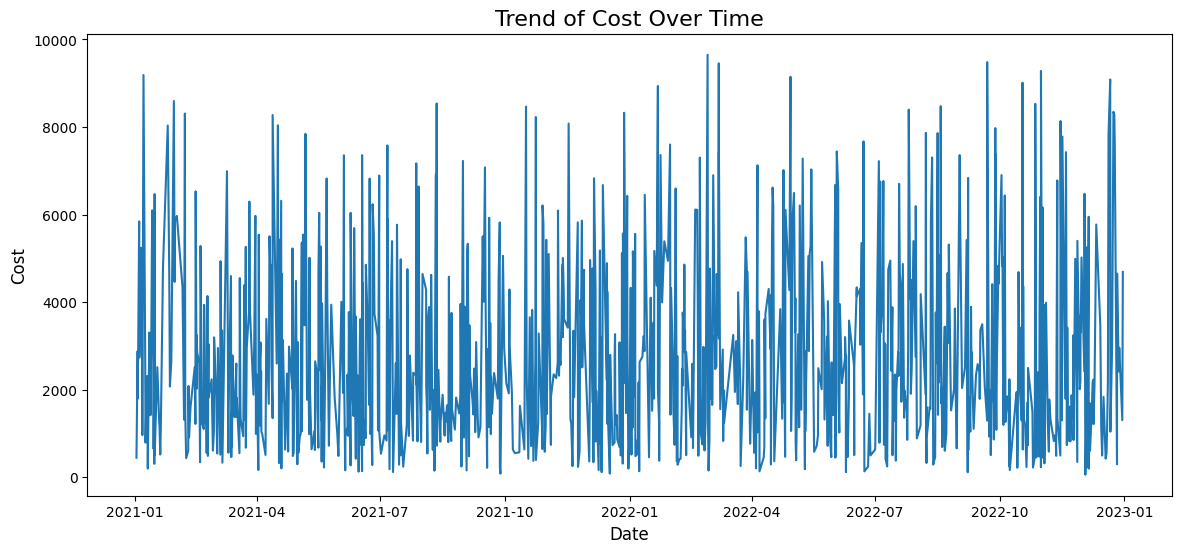

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of cost over time
sns.lineplot(x="Date", y="Cost", data=sem_df)

# Set the title and labels
plt.title("Trend of Cost Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Cost", size=12)

# Display the plot
plt.show()


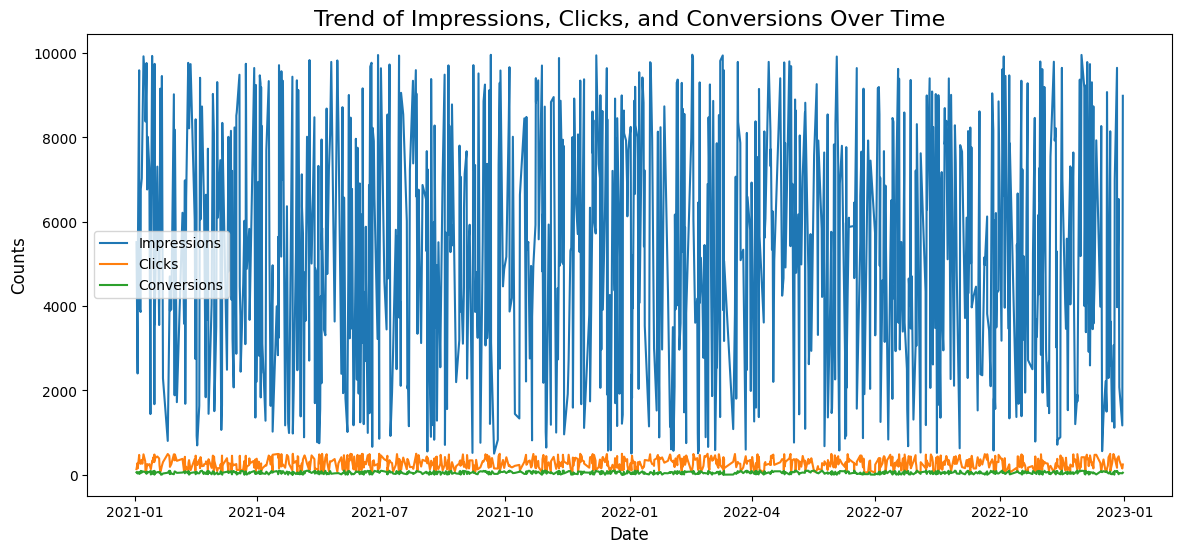

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of impressions, clicks, and conversions over time
sns.lineplot(x="Date", y="Impressions", data=sem_df, label='Impressions')
sns.lineplot(x="Date", y="Clicks", data=sem_df, label='Clicks')
sns.lineplot(x="Date", y="Conversions", data=sem_df, label='Conversions')

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()




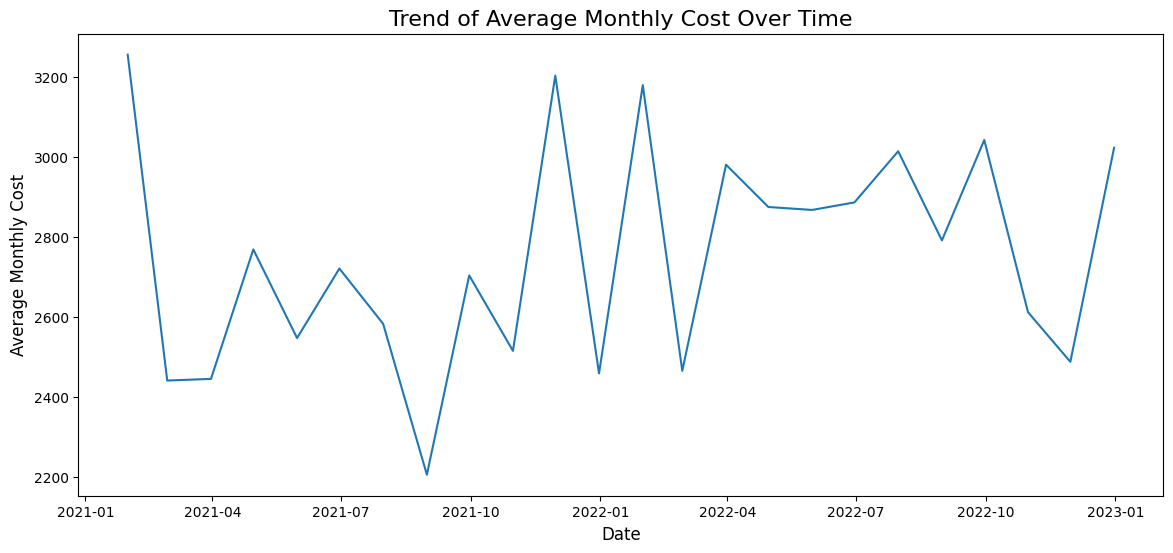

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resample the data by month and compute the mean
sem_df_monthly = sem_df.resample('M', on='Date').mean()

# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of average monthly cost over time
sns.lineplot(x="Date", y="Cost", data=sem_df_monthly)

# Set the title and labels
plt.title("Trend of Average Monthly Cost Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Average Monthly Cost", size=12)

# Display the plot
plt.show()


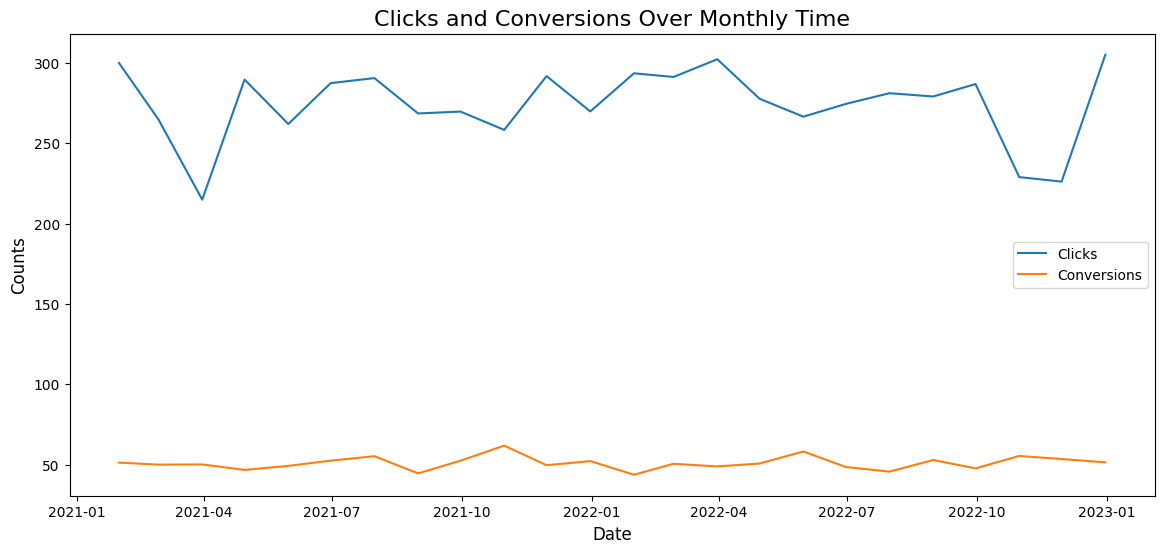

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of impressions, clicks, and conversions over time
sns.lineplot(x="Date", y="Clicks", data=sem_df_monthly, label='Clicks')
sns.lineplot(x="Date", y="Conversions", data=sem_df_monthly, label='Conversions')

# Set the title and labels
plt.title("Clicks and Conversions Over Monthly Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()
 



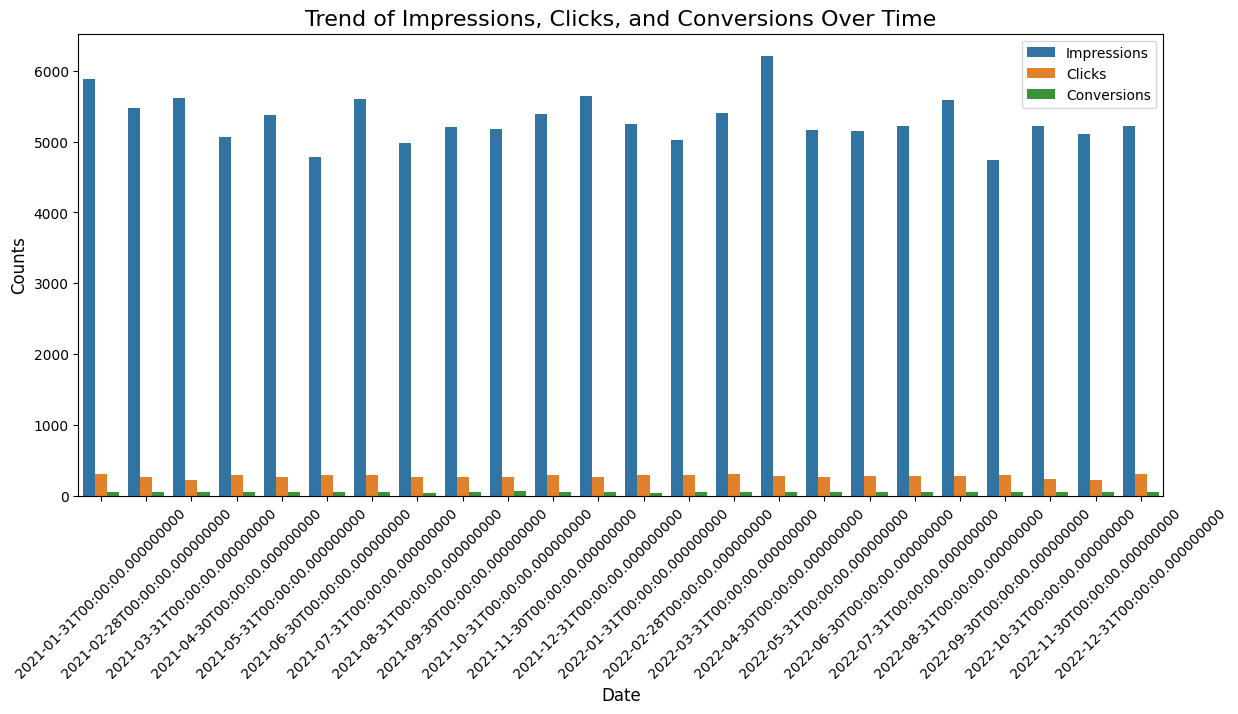

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data
sem_df_monthly_melted = sem_df_monthly.reset_index().melt(id_vars='Date', value_vars=['Impressions', 'Clicks', 'Conversions'])

# Set the figure size
plt.figure(figsize=(14, 6))

# Stacked bar plot
sns.barplot(x="Date", y="value", hue="variable", data=sem_df_monthly_melted, ci=None)

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)
plt.xticks(rotation=45)

# Display the legend and plot
plt.legend()
plt.show()


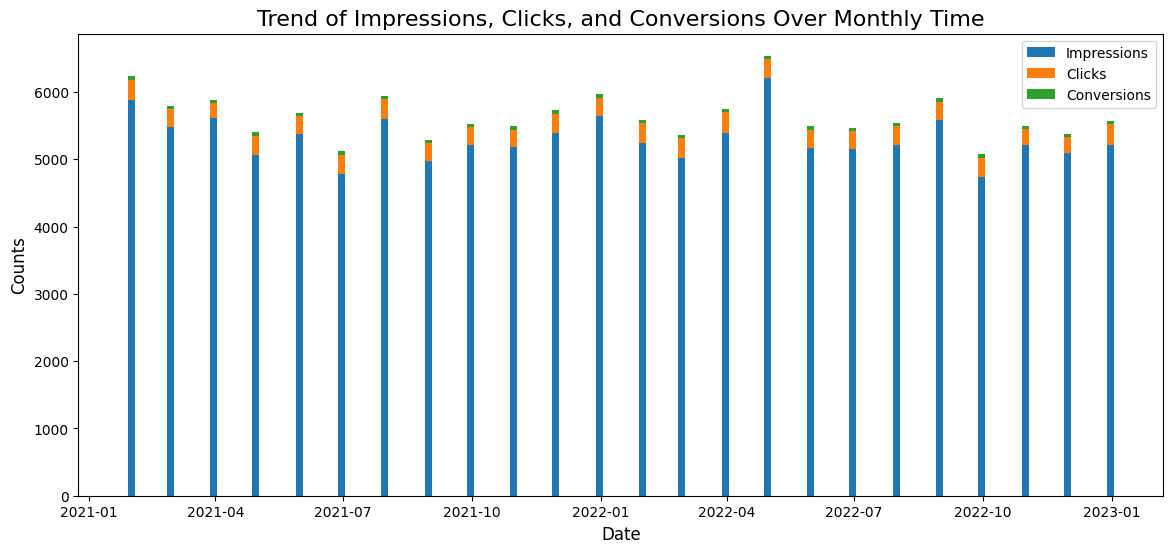

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a stacked bar plot
plt.bar(sem_df_monthly.index, sem_df_monthly["Impressions"], label='Impressions', width=5)
plt.bar(sem_df_monthly.index, sem_df_monthly["Clicks"], bottom=sem_df_monthly["Impressions"], label='Clicks', width=5)
plt.bar(sem_df_monthly.index, sem_df_monthly["Conversions"], bottom=sem_df_monthly["Impressions"] + sem_df_monthly["Clicks"], label='Conversions', width=5)

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Monthly Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()


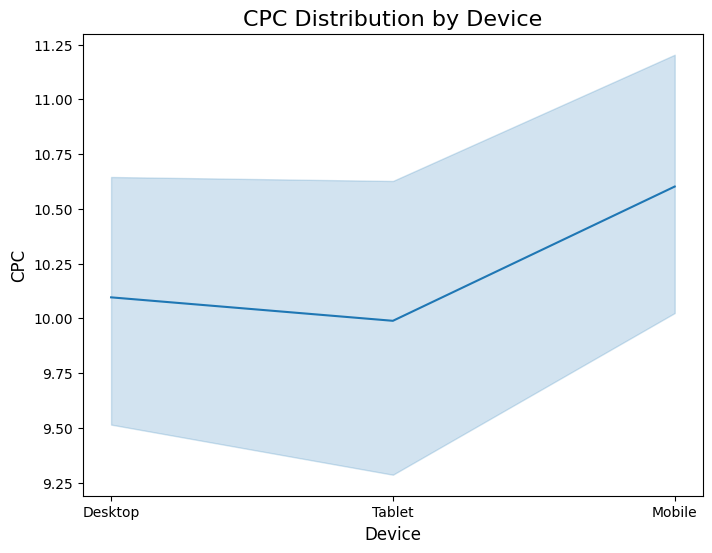

In [ ]:
# Create a new column for Cost Per Click
sem_df['CPC'] = sem_df['Cost'] / sem_df['Clicks']

# Set the figure size
plt.figure(figsize=(8, 6))

# Boxplot of CPC by device
sns.lineplot(x="Device", y="CPC", data=sem_df)

# Set the title and labels
plt.title("CPC Distribution by Device", size=16)
plt.xlabel("Device", size=12)
plt.ylabel("CPC", size=12)

# Display the plot
plt.show()


In [561]:
# Group by Keyword and calculate sum
keyword_performance = sem_df.groupby('Keyword').mean()

# Sort by Conversions and display the top 10 keywords
top_keywords = keyword_performance.sort_values('Conversions', ascending=False).head(10)


print(top_keywords)


            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_20  6137.043478  285.347826    63.652174  10.547787  0.071694   
Keyword_19  4528.900000  295.400000    61.250000   9.549187  0.080177   
Keyword_15  4989.076923  200.076923    59.384615   9.882102  0.057239   
Keyword_39  5958.950000  246.050000    58.500000   8.752209  0.054333   
Keyword_43  4413.625000  252.062500    58.312500   9.425071  0.097463   
Keyword_50  3922.222222  270.000000    58.277778   9.475431  0.115547   
Keyword_37  5730.961538  269.923077    58.269231  11.201146  0.083098   
Keyword_28  4630.333333  258.523810    57.857143  12.549812  0.109172   
Keyword_29  5625.894737  306.894737    57.684211  11.378382  0.096007   
Keyword_27  5081.250000  208.900000    57.150000  10.504953  0.081151   

            Conversion Rate         Cost  Keyword Profitability  \
Keyword                                                 

In [ ]:
print(sem_df['Conversions'].sum())

50872


In [562]:
# Assume a constant value for revenue per conversion
revenue_per_conversion = 150

# Calculate ROAS for each keyword
keyword_performance ['ROAS'] = keyword_performance['Conversions'] * revenue_per_conversion / keyword_performance['Cost']

# Display the top 10 keywords by ROAS
top_roas_keywords = keyword_performance.sort_values('ROAS', ascending=False).head(10)

# Display the bottom 10 keywords by ROAS
bottom_roas_keywords = keyword_performance.sort_values('ROAS', ascending=True).head(10)



In [563]:
sorted_keyword_performance = keyword_performance.sort_values('ROAS', ascending=False)
sorted_keyword_performance['ROAS'].value_counts(bins=5)


(2.247, 2.864]    22
(2.864, 3.48]     11
(1.627, 2.247]     7
(3.48, 4.097]      5
(4.097, 4.713]     5
Name: ROAS, dtype: int64

In [564]:
top_increase_opportunities = keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True])
print(top_increase_opportunities.head(10))

            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_3   5960.375000  193.625000    54.750000  10.604957  0.050548   
Keyword_45  5176.714286  233.500000    53.928571   8.368888  0.048814   
Keyword_43  4413.625000  252.062500    58.312500   9.425071  0.097463   
Keyword_39  5958.950000  246.050000    58.500000   8.752209  0.054333   
Keyword_27  5081.250000  208.900000    57.150000  10.504953  0.081151   
Keyword_15  4989.076923  200.076923    59.384615   9.882102  0.057239   
Keyword_44  5853.850000  279.200000    53.550000   8.502317  0.065410   
Keyword_5   5384.058824  231.235294    55.941176   9.394253  0.070268   
Keyword_50  3922.222222  270.000000    58.277778   9.475431  0.115547   
Keyword_10  6133.714286  300.952381    51.571429   7.567473  0.090554   

            Conversion Rate         Cost  Keyword Profitability  \
Keyword                                                 

In [565]:
reduce_or_pause = keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[True, False])
print(reduce_or_pause.head(10))

            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_49  4826.150000  319.450000    42.750000  12.274947  0.145336   
Keyword_46  5559.095238  259.047619    40.523810  12.589717  0.090121   
Keyword_40  6649.388889  308.277778    48.500000  12.291012  0.058956   
Keyword_13  4968.272727  270.227273    40.090909  10.359235  0.086944   
Keyword_22  4936.666667  304.466667    36.133333   8.286041  0.101073   
Keyword_18  4478.894737  257.052632    45.052632  11.609175  0.123041   
Keyword_47  6173.818182  321.000000    52.954545  11.706173  0.082551   
Keyword_7   5768.761905  244.380952    40.047619  10.597856  0.067805   
Keyword_34  4958.750000  315.150000    52.500000  10.613222  0.092266   
Keyword_14  4400.250000  304.437500    48.312500  10.114751  0.138842   

            Conversion Rate         Cost  Keyword Profitability  \
Keyword                                                 

In [ ]:
recommendations = []
for row in keyword_performance['ROAS']:
  if row >= 3:
    recommendations.append(str("Increase"))
  elif row >= 2.5:
    recommendations.append(str("Hold"))
  else:
    recommendations.append(str("Reduce"))
print(recommendations)
keyword_performance['Recommendations'] = recommendations

['Hold', 'Increase', 'Hold', 'Hold', 'Reduce', 'Reduce', 'Increase', 'Increase', 'Increase', 'Reduce', 'Increase', 'Reduce', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Increase', 'Hold', 'Hold', 'Increase', 'Hold', 'Hold', 'Increase', 'Increase', 'Reduce', 'Hold', 'Reduce', 'Reduce', 'Hold', 'Hold', 'Hold', 'Hold', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Reduce', 'Increase', 'Increase', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Reduce', 'Increase', 'Increase', 'Hold', 'Reduce', 'Increase', 'Reduce']


In [ ]:
keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True]).head(10)

,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations
Keyword,,,,,,,,,
Keyword_3,5960.375000,193.625000,54.750000,10.604957,0.050548,0.398711,1742.437752,4.713224,Increase
Keyword_45,5176.714286,233.500000,53.928571,8.368888,0.048814,0.365377,1749.101911,4.624822,Increase
Keyword_43,4413.625000,252.062500,58.312500,9.425071,0.097463,0.319132,2037.706245,4.292510,Increase
Keyword_39,5958.950000,246.050000,58.500000,8.752209,0.054333,0.346463,2090.205790,4.198151,Increase
Keyword_27,5081.250000,208.900000,57.150000,10.504953,0.081151,0.367061,2060.677055,4.160040,Increase
Keyword_15,4989.076923,200.076923,59.384615,9.882102,0.057239,0.313867,2236.611383,3.982673,Increase
Keyword_44,5853.850000,279.200000,53.550000,8.502317,0.065410,0.229993,2048.630760,3.920912,Increase
Keyword_5,5384.058824,231.235294,55.941176,9.394253,0.070268,0.328445,2327.068186,3.605901,Increase
Keyword_50,3922.222222,270.000000,58.277778,9.475431,0.115547,0.288016,2501.580707,3.494457,Increase


In [ ]:
keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True]).tail(10)

,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations
Keyword,,,,,,,,,
Keyword_14,4400.250000,304.437500,48.312500,10.114751,0.138842,0.241755,3106.845889,2.332551,Reduce
Keyword_34,4958.750000,315.150000,52.500000,10.613222,0.092266,0.163444,3397.692862,2.317749,Reduce
Keyword_7,5768.761905,244.380952,40.047619,10.597856,0.067805,0.202193,2595.527832,2.314421,Reduce
Keyword_47,6173.818182,321.000000,52.954545,11.706173,0.082551,0.179718,3623.010434,2.192426,Reduce
Keyword_18,4478.894737,257.052632,45.052632,11.609175,0.123041,0.243607,3116.355787,2.168525,Reduce
Keyword_22,4936.666667,304.466667,36.133333,8.286041,0.101073,0.143972,2552.094193,2.123746,Reduce
Keyword_13,4968.272727,270.227273,40.090909,10.359235,0.086944,0.199429,2846.964597,2.112298,Reduce
Keyword_40,6649.388889,308.277778,48.500000,12.291012,0.058956,0.254686,3626.958731,2.005813,Reduce
Keyword_46,5559.095238,259.047619,40.523810,12.589717,0.090121,0.261235,3140.626826,1.935464,Reduce


In [ ]:


df = keyword_performance

# Assuming the DataFrame is named df
# df = pd.read_csv('your_data.csv')  # Uncomment this line if reading from a CSV

# Normalize ROAS and CTR
df['ROAS_norm'] = (df['ROAS'] - df['ROAS'].min()) / (df['ROAS'].max() - df['ROAS'].min())
df['CTR_norm'] = (df['CTR'] - df['CTR'].min()) / (df['CTR'].max() - df['CTR'].min())

# Calculate ROAS Score and CTR Score
df['ROAS_Score'] = df['ROAS_norm']
df['CTR_Score'] = 1 - df['CTR_norm']

# Calculate total score
df['Total_Score'] = df['ROAS_Score'] + df['CTR_Score']

# Define thresholds for adjusting CPC
total_score_threshold_high = df['Total_Score'].quantile(0.75)  # 75th percentile as an example
total_score_threshold_low = df['Total_Score'].quantile(0.25)  # 25th percentile as an example

# Adjust CPC based on total score
df['CPC_Adjusted'] = df.apply(lambda row: row['CPC']*1.1 if row['Total_Score'] > total_score_threshold_high else (row['CPC']*0.9 if row['Total_Score'] < total_score_threshold_low else row['CPC']), axis=1)

# CPC change Column
df['CPC_Change'] = df['CPC_Adjusted'] - df['CPC']

df.sort_values(['ROAS', 'CTR'], ascending=[False, True])





,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations,ROAS_norm,CTR_norm,ROAS_Score,CTR_Score,Total_Score,CPC_Adjusted,CPC_Change
Keyword,,,,,,,,,,,,,,,,
Keyword_3,5960.375000,193.625000,54.750000,10.604957,0.050548,0.398711,1742.437752,4.713224,Increase,1.000000,0.013527,1.000000,0.986473,1.986473,11.665452,1.060496
Keyword_45,5176.714286,233.500000,53.928571,8.368888,0.048814,0.365377,1749.101911,4.624822,Increase,0.971321,0.000000,0.971321,1.000000,1.971321,9.205776,0.836889
Keyword_43,4413.625000,252.062500,58.312500,9.425071,0.097463,0.319132,2037.706245,4.292510,Increase,0.863514,0.379644,0.863514,0.620356,1.483870,10.367579,0.942507
Keyword_39,5958.950000,246.050000,58.500000,8.752209,0.054333,0.346463,2090.205790,4.198151,Increase,0.832902,0.043068,0.832902,0.956932,1.789834,9.627430,0.875221
Keyword_27,5081.250000,208.900000,57.150000,10.504953,0.081151,0.367061,2060.677055,4.160040,Increase,0.820539,0.252351,0.820539,0.747649,1.568187,11.555449,1.050495
Keyword_15,4989.076923,200.076923,59.384615,9.882102,0.057239,0.313867,2236.611383,3.982673,Increase,0.762998,0.065744,0.762998,0.934256,1.697254,10.870313,0.988210
Keyword_44,5853.850000,279.200000,53.550000,8.502317,0.065410,0.229993,2048.630760,3.920912,Increase,0.742962,0.129511,0.742962,0.870489,1.613451,9.352549,0.850232
Keyword_5,5384.058824,231.235294,55.941176,9.394253,0.070268,0.328445,2327.068186,3.605901,Increase,0.640767,0.167417,0.640767,0.832583,1.473350,10.333678,0.939425
Keyword_50,3922.222222,270.000000,58.277778,9.475431,0.115547,0.288016,2501.580707,3.494457,Increase,0.604613,0.520773,0.604613,0.479227,1.083840,9.475431,0.000000


In [ ]:
recommendations = []
for row in df['CPC_Change']:
  if row > 0:
    recommendations.append(str("Increase"))
  elif row == 0:
    recommendations.append(str("Hold"))
  else:
    recommendations.append(str("Reduce"))
print(recommendations)
df['Recommendations'] = recommendations

['Reduce', 'Increase', 'Reduce', 'Increase', 'Reduce', 'Reduce', 'Increase', 'Hold', 'Increase', 'Reduce', 'Hold', 'Hold', 'Increase', 'Hold', 'Reduce', 'Hold', 'Hold', 'Hold', 'Hold', 'Increase', 'Hold', 'Hold', 'Increase', 'Hold', 'Hold', 'Hold', 'Hold', 'Reduce', 'Increase', 'Hold', 'Hold', 'Reduce', 'Increase', 'Hold', 'Hold', 'Reduce', 'Reduce', 'Increase', 'Increase', 'Increase', 'Reduce', 'Hold', 'Reduce', 'Reduce', 'Increase', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold']


In [ ]:
df.sort_values(['ROAS', 'CTR'], ascending=[False, True])


,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations,ROAS_norm,CTR_norm,ROAS_Score,CTR_Score,Total_Score,CPC_Adjusted,CPC_Change
Keyword,,,,,,,,,,,,,,,,
Keyword_3,5960.375000,193.625000,54.750000,10.604957,0.050548,0.398711,1742.437752,4.713224,Increase,1.000000,0.013527,1.000000,0.986473,1.986473,11.665452,1.060496
Keyword_45,5176.714286,233.500000,53.928571,8.368888,0.048814,0.365377,1749.101911,4.624822,Increase,0.971321,0.000000,0.971321,1.000000,1.971321,9.205776,0.836889
Keyword_43,4413.625000,252.062500,58.312500,9.425071,0.097463,0.319132,2037.706245,4.292510,Increase,0.863514,0.379644,0.863514,0.620356,1.483870,10.367579,0.942507
Keyword_39,5958.950000,246.050000,58.500000,8.752209,0.054333,0.346463,2090.205790,4.198151,Increase,0.832902,0.043068,0.832902,0.956932,1.789834,9.627430,0.875221
Keyword_27,5081.250000,208.900000,57.150000,10.504953,0.081151,0.367061,2060.677055,4.160040,Increase,0.820539,0.252351,0.820539,0.747649,1.568187,11.555449,1.050495
Keyword_15,4989.076923,200.076923,59.384615,9.882102,0.057239,0.313867,2236.611383,3.982673,Increase,0.762998,0.065744,0.762998,0.934256,1.697254,10.870313,0.988210
Keyword_44,5853.850000,279.200000,53.550000,8.502317,0.065410,0.229993,2048.630760,3.920912,Increase,0.742962,0.129511,0.742962,0.870489,1.613451,9.352549,0.850232
Keyword_5,5384.058824,231.235294,55.941176,9.394253,0.070268,0.328445,2327.068186,3.605901,Increase,0.640767,0.167417,0.640767,0.832583,1.473350,10.333678,0.939425
Keyword_50,3922.222222,270.000000,58.277778,9.475431,0.115547,0.288016,2501.580707,3.494457,Hold,0.604613,0.520773,0.604613,0.479227,1.083840,9.475431,0.000000


In [ ]:
df['CPC_Percentage_Change'] = (df['CPC_Change'] / df['CPC']) * 100


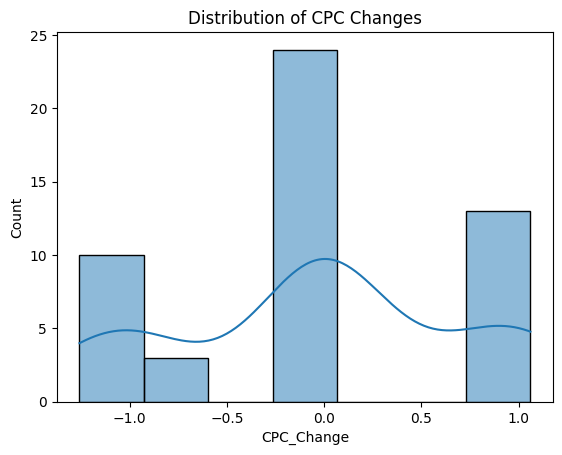

In [ ]:
# Plot distribution of CPC changes
sns.histplot(data=df, x="CPC_Change", kde=True)
plt.title("Distribution of CPC Changes")
plt.show()


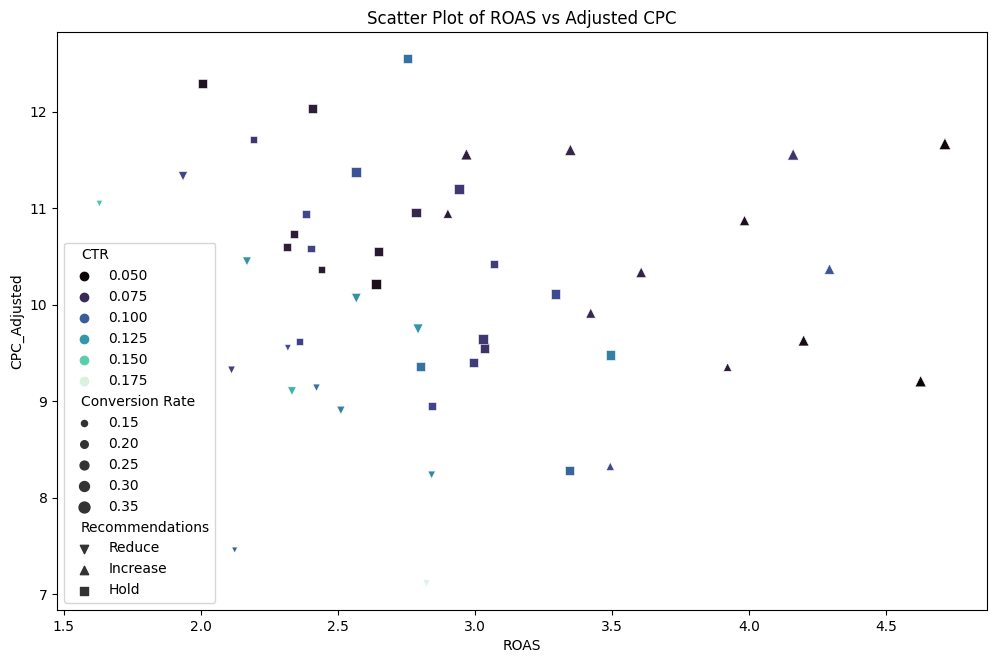

In [ ]:
# Scatter plot of ROAS vs CPC
markers = {"Increase": "^", "Hold": "s", "Reduce": "v"}

fig, ax = plt.subplots(figsize=(12, 7.5))
sns.scatterplot(data=df, x="ROAS", y="CPC_Adjusted", hue="CTR", palette="mako", style="Recommendations", size="Conversion Rate", markers=markers)
plt.title("Scatter Plot of ROAS vs Adjusted CPC")
plt.show()


In [ ]:
print(df.columns)

Index(['Impressions', 'Clicks', 'Conversions', 'CPC', 'CTR', 'Conversion Rate',
       'Cost', 'ROAS', 'Recommendations', 'ROAS_norm', 'CTR_norm',
       'ROAS_Score', 'CTR_Score', 'Total_Score', 'CPC_Adjusted', 'CPC_Change',
       'CPC_Percentage_Change'],
      dtype='object')


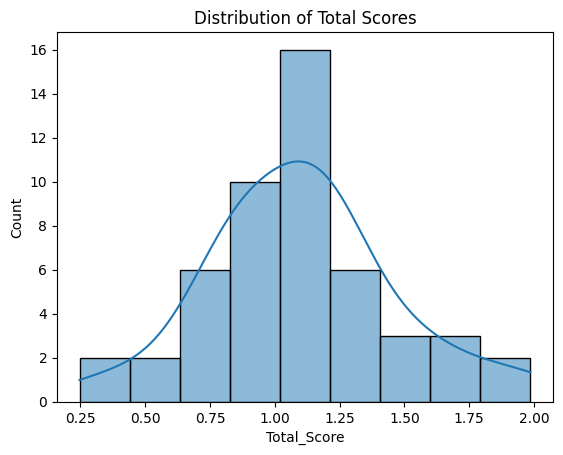

In [ ]:
# Plot distribution of Total Scores
sns.histplot(data=df, x="Total_Score", kde=True)
plt.title("Distribution of Total Scores")
plt.show()


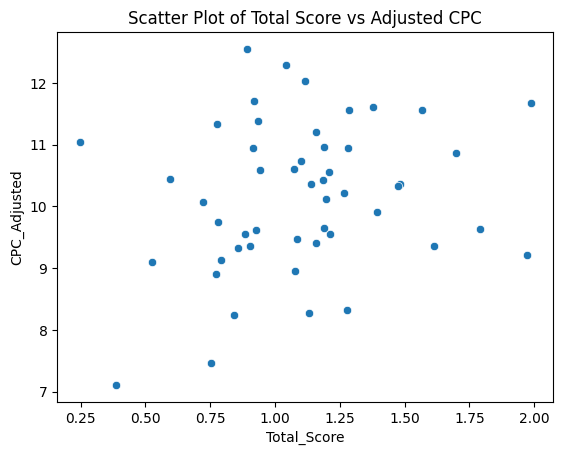

In [ ]:
# Scatter plot of Total Score vs CPC Adjusted
sns.scatterplot(data=df, x="Total_Score", y="CPC_Adjusted")
plt.title("Scatter Plot of Total Score vs Adjusted CPC")
plt.show()


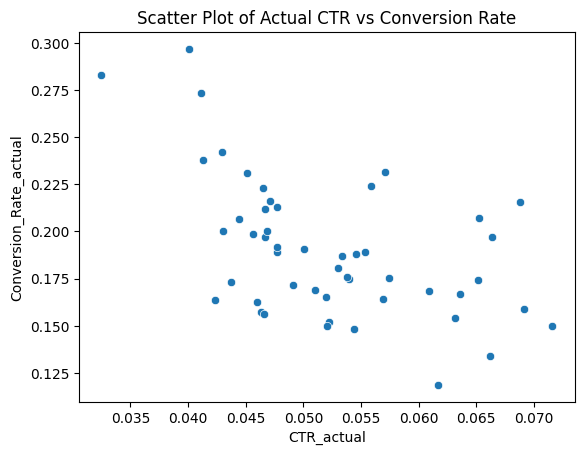

In [ ]:
# Calculate the Click Through Rate (CTR) and Conversion Rate
df['CTR_actual'] = df['Clicks'] / df['Impressions']
df['Conversion_Rate_actual'] = df['Conversions'] / df['Clicks']

# Scatter plot of CTR_actual vs Conversion_Rate_actual
sns.scatterplot(data=df, x="CTR_actual", y="Conversion_Rate_actual")
plt.title("Scatter Plot of Actual CTR vs Conversion Rate")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the feature columns and the target column
feature_cols = ['CPC', 'Impressions', 'CTR']
target_col = 'Clicks'

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the first 5 predictions
print(y_pred[:5])


[247.11154564 226.94076202 281.27690795 253.90886718 287.65313692]


We have a negative coeffecient tied to CPC because our dataset was created with random data, in reality **(this is a very possible scenario)** this would imply your ad quality was low or that we were winning top placement and every auction already -  as an increase in CPC was not correlated with an increase in clicks by the model. 

In [ ]:
# Print the coefficients of the model
coefficients = model.coef_
print(coefficients)


[-1.32458842e+00  3.62714928e-02  1.10793926e+03]


Model predicts accurately within 30 clicks

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 29.91242564606142


In [ ]:
df['Clicks'].mean()

272.5850999753338

In [ ]:
accuracy_ratio = 1 - (rmse/ df['Clicks'].mean())
print(f'Accuracy Ratio: {accuracy_ratio * 100:.2f}%')




Accuracy Ratio: 89.03%


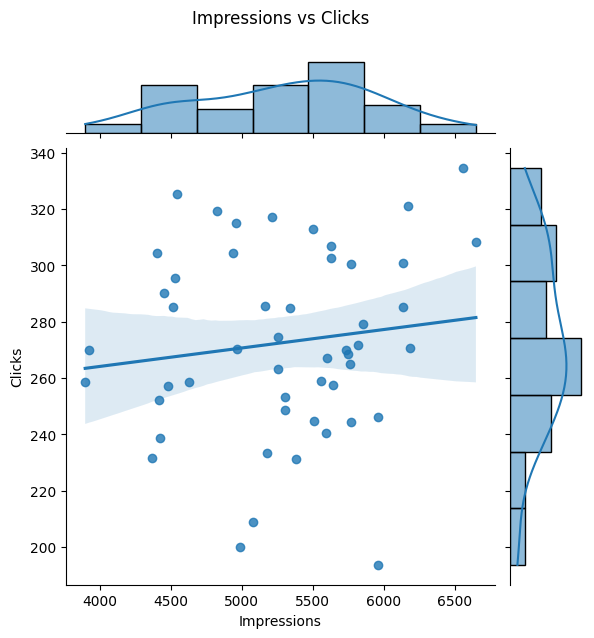

In [ ]:
sns.jointplot(data=df, x="Impressions", y="Clicks", kind="reg")
plt.title("Impressions vs Clicks", pad=90)
plt.show()


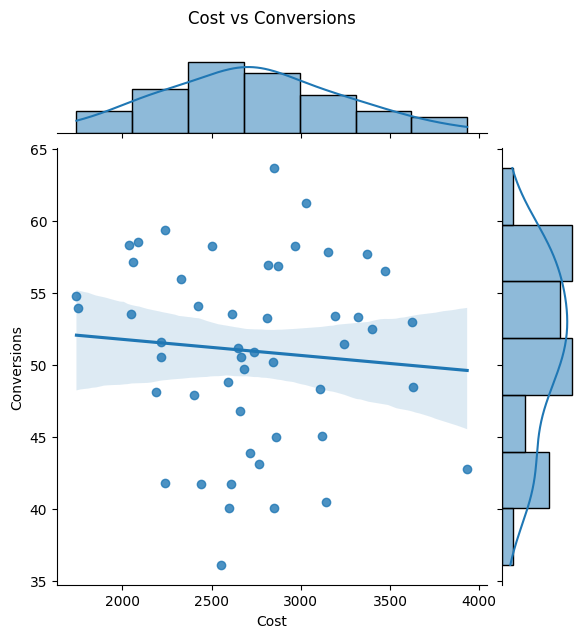

In [ ]:
sns.jointplot(data=df, x="Cost", y="Conversions", kind="reg")
plt.title("Cost vs Conversions", pad=90)
plt.show()


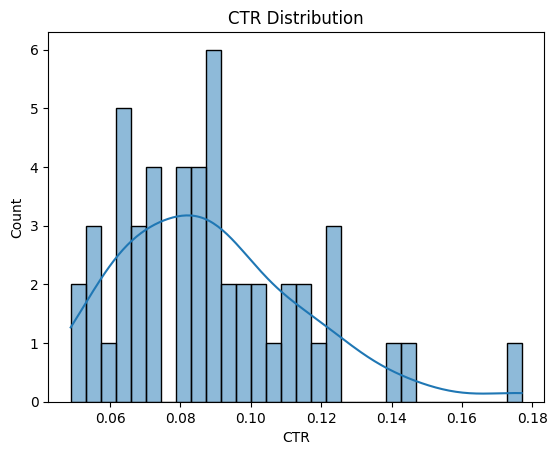

In [ ]:
sns.histplot(df["CTR"], kde=True, bins=30)
plt.title("CTR Distribution")
plt.show()


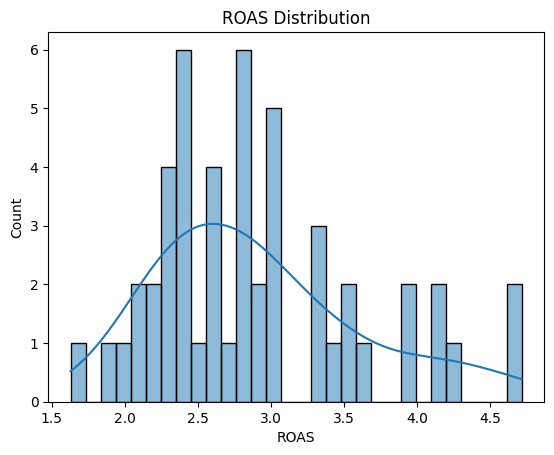

In [ ]:
sns.histplot(df["ROAS"], kde=True, bins=30)
plt.title("ROAS Distribution")
plt.show()


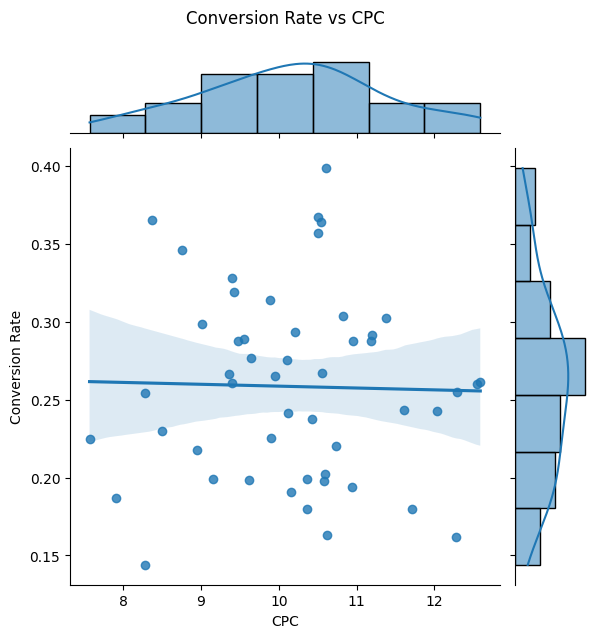

In [ ]:
sns.jointplot(data=df, x="CPC", y="Conversion Rate", kind="reg")
plt.title("Conversion Rate vs CPC", pad=90)
plt.show()


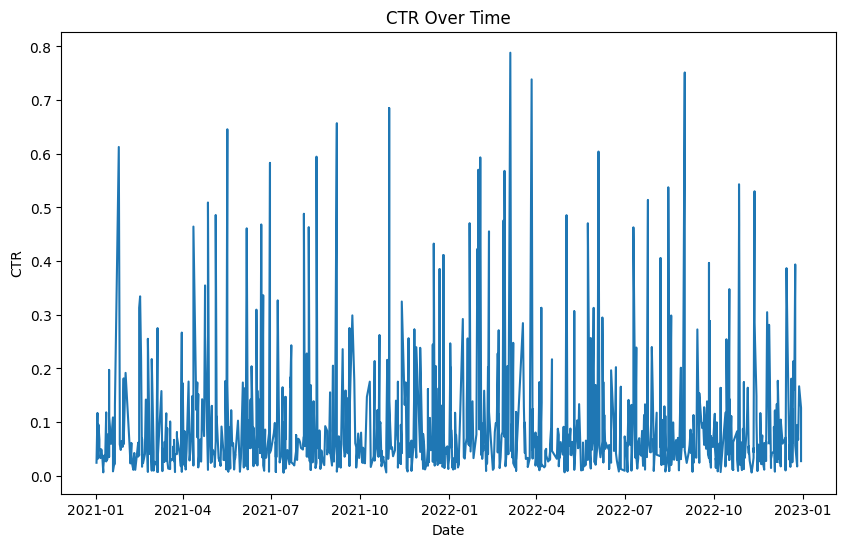

In [542]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(sem_df['Date'], sem_df['CTR'])
plt.title('CTR Over Time')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.show()



In [ ]:
sem_df['Date'] = sem_df['Date'].dt.date


In [ ]:
sem_df.columns


Index(['Keyword', 'Location', 'Device', 'Impressions', 'Clicks', 'Conversions',
       'CPC', 'CTR', 'Conversion Rate', 'Cost', 'Date', 'Ad Version'],
      dtype='object')

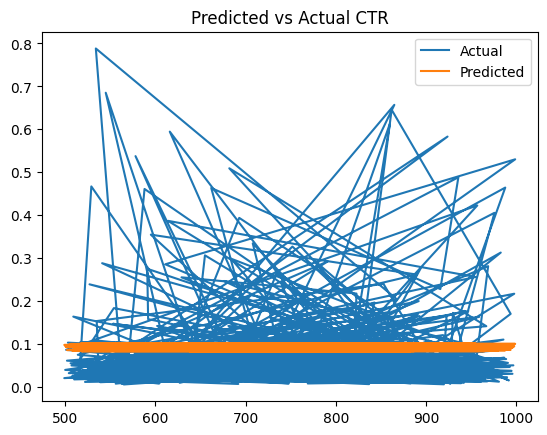

In [543]:
from sklearn.linear_model import LinearRegression

# Assume we have a time-based dataframe
df_time = sem_df.sort_values(by='Date') 

# Get the last 10% of data for testing
split_date = df_time.iloc[int(len(df_time)*0.9)].name

train = df_time.loc[df_time.index <= split_date]
test = df_time.loc[df_time.index > split_date]

X_train = train.index.factorize()[0].reshape(-1, 1) # convert dates to ordinal, reshape for sklearn
y_train = train['CTR']

X_test = test.index.factorize()[0].reshape(-1, 1)
y_test = test['CTR']

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting CTR and comparing with actual values
y_pred = model.predict(X_test)

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs Actual CTR')
plt.show()


In [551]:
# Calculate Keyword Profitability
df['Keyword Profitability'] = (df['Clicks'] * df['ROAS']) - df['Cost']

# Calculate Auction Drop Off
df['Auction Drop Off'] = (1 - df['CTR']) * df['Impressions']


In [555]:
print(df.head())

            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_1   3896.600000  258.720000    50.920000  10.830218  0.125440   
Keyword_10  6133.714286  300.952381    51.571429   7.567473  0.090554   
Keyword_11  4425.250000  238.800000    41.750000  11.185212  0.123409   
Keyword_12  5641.533333  257.533333    51.200000   9.947637  0.065269   
Keyword_13  4968.272727  270.227273    40.090909  10.359235  0.086944   

            Conversion Rate         Cost      ROAS Recommendations  ROAS_norm  \
Keyword                                                                         
Keyword_1          0.303888  2735.249923  2.792432          Reduce   0.376866   
Keyword_10         0.225011  2214.482696  3.493238        Increase   0.604218   
Keyword_11         0.287821  2439.335425  2.567298          Reduce   0.303829   
Keyword_12         0.265005  2647.299415  2.901070        Increase   0.412110   
Ke